<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       9944

<ipython-input-1-14f033a9576b>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_count", y="customer_state", data=bystate_df, palette=colors_)
<ipython-input-1-14f033a9576b>:97: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="customer_count", y="customer_state", data=bystate_df, palette=colors_)


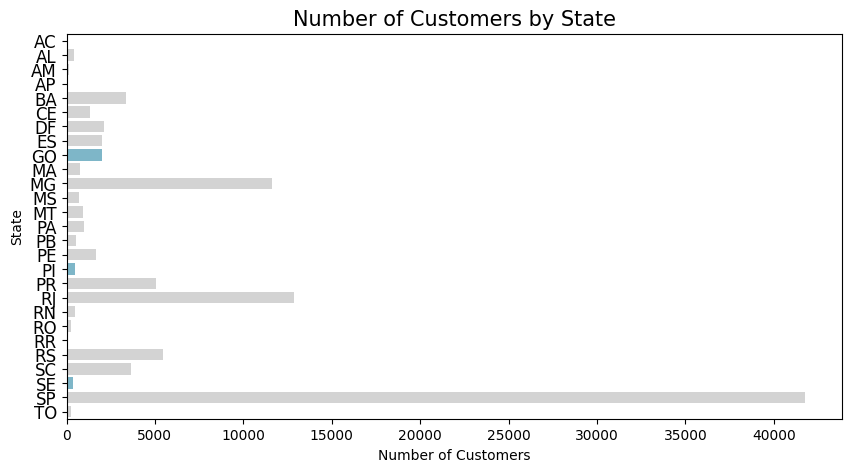

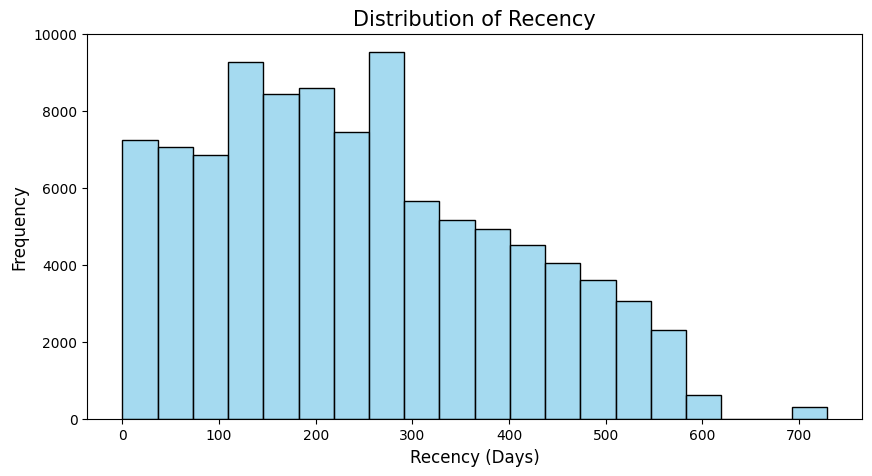

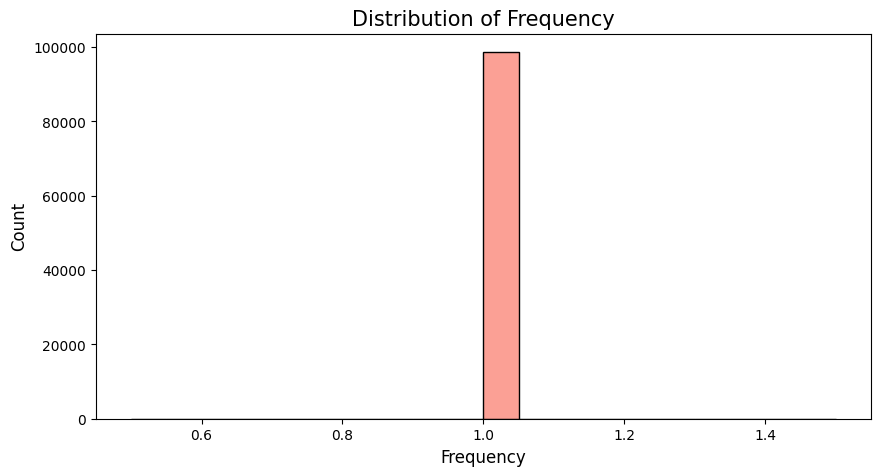

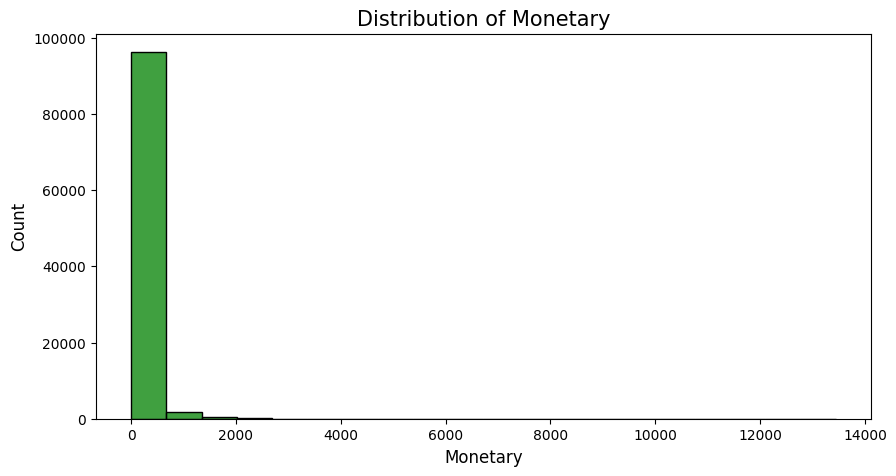

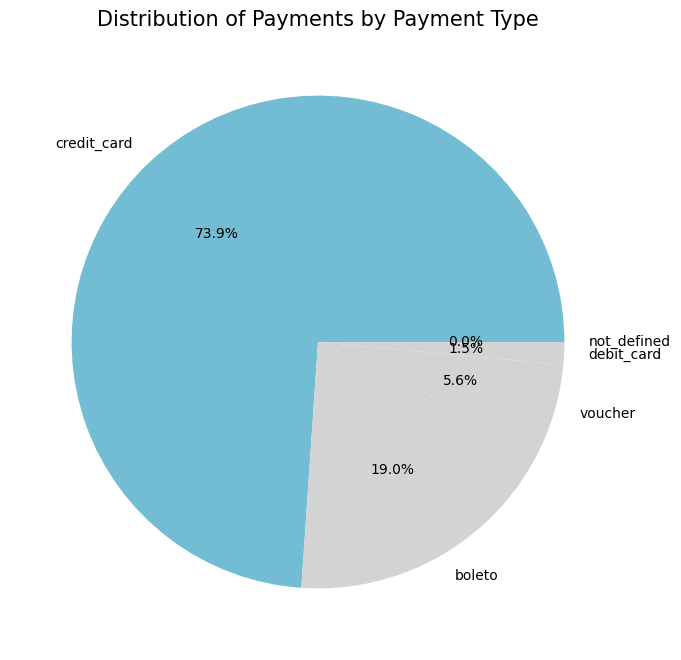

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gathering Data
customers_df = pd.read_csv ("https://raw.githubusercontent.com/gloryindahs/E-commerce-Gathering-Data/main/customers_dataset.csv")
customers_df.head()

orders_df = pd.read_csv ("https://raw.githubusercontent.com/gloryindahs/E-commerce-Gathering-Data/main/orders_dataset.csv")
orders_df.head()

order_payments_df= pd.read_csv ("https://raw.githubusercontent.com/gloryindahs/E-commerce-Gathering-Data/main/order_payments_dataset.csv")
order_payments_df.head()

order_items_df = pd.read_csv("https://raw.githubusercontent.com/gloryindahs/E-commerce-Gathering-Data/main/order_items_dataset.csv")

# Assessing Data
customers_df.info()
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

customers_df.describe()
orders_df.info()
orders_df.isna().sum()
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()
order_payments_df.info()
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

order_payments_df.describe()

orders_df[orders_df.order_approved_at.isna()]
orders_df.order_approved_at.value_counts()
orders_df[orders_df.order_delivered_carrier_date.isna()]
orders_df.order_delivered_carrier_date.value_counts()
orders_df[orders_df.order_delivered_customer_date.isna()]
orders_df.order_delivered_customer_date.value_counts()
orders_df.fillna(value="2018-05-08 23:38:46", inplace=True)
orders_df.fillna(value="2018-02-27 04:31:10  ", inplace=True)
orders_df.isna().sum()


# Customers
customers_df.describe(include="all")
customers_df.groupby(by="customer_zip_code_prefix").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

# Orders
orders_df.describe(include="all")
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)
orders_df.groupby(by="order_purchase_timestamp").order_id.nunique().sort_values(ascending=False)
orders_df.groupby(by="order_estimated_delivery_date").order_id.nunique().sort_values(ascending=False)


# Order Payments
order_payments_df.describe(include="all")
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
order_payments_df.sort_values(by="payment_value", ascending=False)
order_payments_df.sort_values(by="payment_sequential", ascending=False)


# Orders
orders_df.fillna(value="2018-05-08 23:38:46", inplace=True)
orders_df.fillna(value="2018-02-27 04:31:10  ", inplace=True)

# Explore ...

# Customers
customers_df.describe(include="all")
customers_df.groupby(by="customer_zip_code_prefix").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

# Orders
orders_df.describe(include="all")
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)
orders_df.groupby(by="order_purchase_timestamp").order_id.nunique().sort_values(ascending=False)
orders_df.groupby(by="order_estimated_delivery_date").order_id.nunique().sort_values(ascending=False)

# Order Payments
order_payments_df.describe(include="all")
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
order_payments_df.sort_values(by="payment_value", ascending=False)
order_payments_df.sort_values(by="payment_sequential", ascending=False)


# Visualization & Explanatory Analysis

# Pertanyaan 1:

bystate_df = customers_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={"customer_id": "customer_count"}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="customer_count", y="customer_state", data=bystate_df, palette=colors_)
plt.title("Number of Customers by State", loc="center", fontsize=15)
plt.ylabel("State")
plt.xlabel("Number of Customers")
plt.tick_params(axis='y', labelsize=12)
plt.show()


# Pertanyaan 2:

# Gabungkan DataFrames order_items_df, orders_df, dan order_payments_df
merged_df = pd.merge(order_items_df, orders_df, on="order_id", how="left")
merged_df = pd.merge(merged_df, order_payments_df, on="order_id", how="left")

# Agregasi untuk RFM
rfm_df = merged_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"  # Ubah ke nama kolom yang sesuai jika perlu
})

# Ubah nama kolom
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Ubah tipe data kolom tanggal
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"]).dt.date

# Hitung recency
recent_date = rfm_df["max_order_timestamp"].max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Hapus kolom yang tidak diperlukan
rfm_df.drop(["max_order_timestamp"], axis=1, inplace=True)

# Grafik Recency
plt.figure(figsize=(10, 5))
sns.histplot(rfm_df['recency'], bins=20, color='skyblue')
plt.title('Distribution of Recency', fontsize=15)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Grafik Frequency
plt.figure(figsize=(10, 5))
sns.histplot(rfm_df['frequency'], bins=20, color='salmon')
plt.title('Distribution of Frequency', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Grafik Monetary
plt.figure(figsize=(10, 5))
sns.histplot(rfm_df['monetary'], bins=20, color='green')
plt.title('Distribution of Monetary', fontsize=15)
plt.xlabel('Monetary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()




# Pertanyaan 3:

payment_type_counts = order_payments_df['payment_type'].value_counts()

plt.figure(figsize=(8, 8))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', colors=colors_)
plt.title("Distribution of Payments by Payment Type", fontsize=15)
plt.show()

# Save to CSV
all_df = pd.concat([customers_df, orders_df, order_payments_df], axis=1)

# Simpan DataFrame ke dalam file CSV
all_df.to_csv("all_data.csv", index=False)
